# Plotting dataslices for Run0126f

###### Plotting_Run0126f
-  Experiment: see if cut-off in Bokeh viewer is possible a Bokeh front-end artefact or not.

In [ ]:
# DO NOT RUN THIS PART

In [ ]:
import os
import sys
import time

# Gets the current file name. Useful for procedurally generating output/log files.
file_name =  os.path.basename(sys.argv[0][:-3])
print(file_name)

if file_name == "ipykernel_launcher":
    print("This is the Jupyter version.")
    print("Now MANUALLY run the next two cells!")
    print("STOP! This should not be in your code!!")
    exit(0)
    time.sleep(10)
    print("Testing if script has really stopped.")
else:
    print("This is the Atom version")

In [1]:
# RUN ONLY IN JUPYTER!!
# Start here (manual)

In [2]:
%%javascript
IPython.notebook.kernel.execute('file_name = "' + IPython.notebook.notebook_name + '"');

<IPython.core.display.Javascript object>

In [3]:
print(file_name)

2018-10-18_Plotting_Run0126f.ipynb


In [4]:
file_name = file_name[:-6]
print(file_name)

is_Jupyter = True
print(is_Jupyter)

2018-10-18_Plotting_Run0126f
True


In [5]:
# Same code for both ATOM & JUPYTER from now (Run all cells below now)

In [6]:
'''
Late Fusion Module - Functional API
'''

# Multiple Inputs
import keras
from keras.optimizers import RMSprop, adam, Adam
from keras.initializers import TruncatedNormal, glorot_normal
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from keras import regularizers
from keras import backend as K
from keras.backend import switch
import pandas
import numpy
import sys
import os
from copy import deepcopy
import tensorflow as tf
from keras.utils.generic_utils import get_custom_objects
from keras.layers.advanced_activations import ThresholdedReLU

keras.backend.clear_session()

Using TensorFlow backend.


In [7]:
# Define new Metric: rmse = Root Mean Square Error
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square( y_true-y_pred )))

In [8]:
# Modify for ATOM use

In [9]:
if is_Jupyter == True:
    pass
else:
    # Gets the current file name. Useful for procedurally generating output/log files.
    file_name =  os.path.basename(sys.argv[0][:-3])

In [10]:
# Define neural network parameters
batch_size = 10
#num_classes = 1
epochs = 100

In [11]:
# Load Data (which is in HDF5 or .h5 format)
store = pandas.HDFStore("../unstable_training_gen3_7D_nions0_flat_filter8.h5")
target_df = store['/output/efeETG_GB'].to_frame()  # This one is relatively easy to train
input_df = store['input']

# Puts inputs and outputs in the same pandas dataframe.
# Also only keeps overlapping entries.
joined_dataFrame = target_df.join(input_df)

# Make a copy of joined_dataFrame for later use
joined_dataFrame_original = deepcopy(joined_dataFrame)


# *************************************************************************** #
# Normalize data by standard deviation and mean-centering the data
# Standard configuration
joined_dataFrame['efeETG_GB'] = (joined_dataFrame['efeETG_GB'] - joined_dataFrame['efeETG_GB'].mean()) / joined_dataFrame['efeETG_GB'].std()
joined_dataFrame['Ati'] = (joined_dataFrame['Ati'] - joined_dataFrame['Ati'].mean()) / joined_dataFrame['Ati'].std()
joined_dataFrame['Ate'] = (joined_dataFrame['Ate'] - joined_dataFrame['Ate'].mean()) / joined_dataFrame['Ate'].std()
joined_dataFrame['An'] = (joined_dataFrame['An'] - joined_dataFrame['An'].mean()) / joined_dataFrame['An'].std()
joined_dataFrame['q'] = (joined_dataFrame['q'] - joined_dataFrame['q'].mean()) / joined_dataFrame['q'].std()
joined_dataFrame['smag'] = (joined_dataFrame['smag'] - joined_dataFrame['smag'].mean()) / joined_dataFrame['smag'].std()
joined_dataFrame['x'] = (joined_dataFrame['x'] - joined_dataFrame['x'].mean()) / joined_dataFrame['x'].std()
joined_dataFrame['Ti_Te'] = (joined_dataFrame['Ti_Te'] - joined_dataFrame['Ti_Te'].mean()) / joined_dataFrame['Ti_Te'].std()

# Shuffles dataset
shuffled_joined_dataFrame = joined_dataFrame.reindex(numpy.random.permutation(
                                                joined_dataFrame.index))

# Creates a pandas dataframe for the outputs
shuffled_clean_output_df = shuffled_joined_dataFrame['efeETG_GB']

# Make a copy of shuffled_joined_dataFrame for later use
shuffled_joined_dataFrame_base = deepcopy(shuffled_joined_dataFrame)



# *************************************************************************** #
# Creates a pandas dataframe for the inputs (7D)
shuffled_clean_input_df_7D = shuffled_joined_dataFrame.drop('efeETG_GB', axis=1)

# Creates training dataset (90% of total data) for outputs
y_train = shuffled_clean_output_df.iloc[:int(
    numpy.round(len(shuffled_clean_output_df)*0.9))]

# Creates training dataset (90% of total data) for inputs
x_train = shuffled_clean_input_df_7D.iloc[:int(
    numpy.round(len(shuffled_clean_input_df_7D)*0.9))]

# Creates testing dataset (10% of total data) for outputs
y_test = shuffled_clean_output_df.iloc[int(
    numpy.round(len(shuffled_clean_output_df)*0.9)):]

# Creates testing dataset (10% of total data) for inputs
x_test = shuffled_clean_input_df_7D.iloc[int(
    numpy.round(len(shuffled_clean_input_df_7D)*0.9)):]
# *************************************************************************** #


# Deletes pandas dataframes that are no longer needed
del target_df, input_df

# Closes the HDFStore. This is good practice.
store.close()


In [12]:
shuffled_clean_input_df_7D.describe(include='all')

,Ati,Ate,An,q,smag,x,Ti_Te
count,6.393280e+05,6.393280e+05,6.393280e+05,6.393280e+05,6.393280e+05,6.393280e+05,6.393280e+05
mean,1.633424e-12,-6.496300e-13,-4.409594e-14,3.983713e-14,-8.762553e-14,2.687112e-14,5.456717e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.848237e+00,-2.151511e+00,-4.175202e+00,-8.733971e-01,-1.264253e+00,-1.375717e+00,-1.667450e+00
25%,-6.585430e-01,-6.647545e-01,-6.345777e-01,-6.748652e-01,-3.148231e-01,-9.568879e-01,-9.268335e-01
50%,-1.486741e-01,-1.691691e-01,-4.447369e-02,-4.385177e-01,-5.588771e-02,-1.192290e-01,-6.771858e-02
75%,6.161291e-01,4.916113e-01,5.456303e-01,1.523511e-01,4.619831e-01,7.184299e-01,4.210880e-01
max,2.910539e+00,1.813172e+00,2.315942e+00,2.515826e+00,3.914455e+00,1.765503e+00,1.665323e+00


In [13]:
# Creates a pandas dataframe for the inputs
shuffled_clean_input_df_1 = shuffled_clean_input_df_7D.drop('Ate', axis=1)

In [14]:
shuffled_clean_input_df_1.describe(include='all')

,Ati,An,q,smag,x,Ti_Te
count,6.393280e+05,6.393280e+05,6.393280e+05,6.393280e+05,6.393280e+05,6.393280e+05
mean,1.633424e-12,-4.409594e-14,3.983713e-14,-8.762553e-14,2.687112e-14,5.456717e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.848237e+00,-4.175202e+00,-8.733971e-01,-1.264253e+00,-1.375717e+00,-1.667450e+00
25%,-6.585430e-01,-6.345777e-01,-6.748652e-01,-3.148231e-01,-9.568879e-01,-9.268335e-01
50%,-1.486741e-01,-4.447369e-02,-4.385177e-01,-5.588771e-02,-1.192290e-01,-6.771858e-02
75%,6.161291e-01,5.456303e-01,1.523511e-01,4.619831e-01,7.184299e-01,4.210880e-01
max,2.910539e+00,2.315942e+00,2.515826e+00,3.914455e+00,1.765503e+00,1.665323e+00


In [15]:
print(shuffled_clean_input_df_1.shape)

(639328, 6)


In [16]:
shuffled_clean_input_df_2 = shuffled_clean_input_df_7D.drop('Ati', axis=1)
shuffled_clean_input_df_2 = shuffled_clean_input_df_2.drop('An', axis=1)
shuffled_clean_input_df_2 = shuffled_clean_input_df_2.drop('q', axis=1)
shuffled_clean_input_df_2 = shuffled_clean_input_df_2.drop('smag', axis=1)
shuffled_clean_input_df_2 = shuffled_clean_input_df_2.drop('x', axis=1)
shuffled_clean_input_df_2 = shuffled_clean_input_df_2.drop('Ti_Te', axis=1)

In [17]:
shuffled_clean_input_df_2.describe(include='all')

,Ate
count,6.393280e+05
mean,-6.496300e-13
std,1.000000e+00
min,-2.151511e+00
25%,-6.647545e-01
50%,-1.691691e-01
75%,4.916113e-01
max,1.813172e+00


In [19]:
print(shuffled_clean_input_df_2.shape)

(639328, 1)


In [18]:
# *************************************************************************** #
# Branch 1

# Creates training dataset (90% of total data) for inputs
x_train_1 = shuffled_clean_input_df_1.iloc[:int(
    numpy.round(len(shuffled_clean_input_df_1)*0.9))]

# Creates testing dataset (10% of total data) for inputs
x_test_1 = shuffled_clean_input_df_1.iloc[int(
    numpy.round(len(shuffled_clean_input_df_1)*0.9)):]
# *************************************************************************** #

In [20]:
# *************************************************************************** #
# Branch 2

# Creates training dataset (90% of total data) for inputs
x_train_2 = shuffled_clean_input_df_2.iloc[:int(
    numpy.round(len(shuffled_clean_input_df_2)*0.9))]

# Creates testing dataset (10% of total data) for inputs
x_test_2 = shuffled_clean_input_df_2.iloc[int(
    numpy.round(len(shuffled_clean_input_df_2)*0.9)):]
# *************************************************************************** #

# Load Model

In [21]:
from keras.models import load_model

In [22]:
new_model = load_model('../Saved-Networks/2018-10-18_Run0126f.h5', custom_objects={'rmse': rmse})

#### Model information

In [23]:
new_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           210         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           930         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1)            31          dense_2[0][0]                    
__________________________________________________________________________________________________
input_2 (I

In [24]:
new_model.get_weights()

[array([[ 9.20827538e-02,  7.44969537e-03, -1.27615286e-02,
         -4.49762121e-03, -8.18820745e-02, -9.08243284e-02,
         -1.01189330e-01, -2.74339281e-02, -3.73032801e-02,
          1.08491354e-01,  5.59637621e-02,  4.41804789e-02,
         -4.14442979e-02,  2.97600473e-03,  1.59925908e-01,
          2.45702639e-03, -1.04781486e-01, -7.59313777e-02,
         -1.87419681e-03, -6.75688565e-01, -8.78964663e-02,
         -3.17187190e-01,  7.95087740e-02,  5.17779291e-02,
         -5.41160591e-02, -6.20718254e-03, -5.53817265e-02,
         -2.48101028e-03, -9.22650099e-03, -4.45438810e-02],
        [-5.30187011e-01,  5.79828862e-03, -1.44191146e+00,
         -9.89500880e-01, -5.31704783e-01,  4.72524226e-01,
          9.96106744e-01, -1.30063727e-01, -2.38405123e-01,
         -7.12296963e-02,  1.77768543e-01,  1.18307781e+00,
         -3.99106950e-01,  1.61836073e-01,  4.96063113e-01,
         -1.37916775e-02, -1.80234641e-01,  1.76541758e+00,
         -6.67330530e-03, -3.08286399e-

In [27]:
new_model.optimizer

# Predictions (Global)

"Global" in this sense means that I've fed model.predict() with all the possible parameters. This gives a good overview of the overall performance of the network. This can be useful to spot large-scale phenomena like network overfitting but is not so great at looking at say individual data slices. This is done later.

***Nota Bene: all data here is NORMALIZED at this stage.***

In [26]:
y_test_np_array = y_test.values
print(y_test_np_array)
print(y_test_np_array.shape)

[-1.00778849 -0.90798589 -0.74548873 ... -0.36189134 -1.04351651
  0.85297783]
(63933,)


In [25]:
x_test_np_array = x_test.values
print(x_test_np_array)

[[ 1.55088864 -0.91254716  0.25057832 ... -0.31482312  0.29960042
  -0.06771858]
 [ 1.55088864 -0.91254716  0.25057832 ... -0.31482312  0.29960042
   0.42108802]
 [ 1.55088864 -0.91254716  0.25057832 ... -0.31482312  0.29960042
   1.66532336]
 ...
 [ 2.91053885  1.81317227  2.31594238 ...  3.91445512  1.76550348
  -0.55652537]
 [ 2.91053885  1.81317227  2.31594238 ...  3.91445512  1.76550348
   0.42108802]
 [ 2.91053885  1.81317227  2.31594238 ...  3.91445512  1.76550348
   1.66532336]]


In [28]:
x_test_1_np_array = x_test_1.values
x_test_2_np_array = x_test_2.values

In [45]:
print(x_test_1_np_array.shape)

(63933, 6)


In [46]:
print(x_test_2_np_array.shape)

(63933, 1)


In [47]:
print(x_test_np_array.shape)

(63933, 7)


In [48]:
predictions_global = new_model.predict([x_test_1_np_array, x_test_2_np_array], batch_size = 10, verbose=0)
print(type(predictions_global))

predictions_global = predictions_global.flatten()
print(predictions_global.shape)
print(type(predictions_global))

<class 'numpy.ndarray'>
(63933,)
<class 'numpy.ndarray'>


### Predictions (Global) review - De-Normalized

In [49]:
predictions_global_deNormalized = (predictions_global * joined_dataFrame_original['efeETG_GB'].std()) + joined_dataFrame_original['efeETG_GB'].mean()

In [50]:
y_test_deNormalized = (y_test * joined_dataFrame_original['efeETG_GB'].std()) + joined_dataFrame_original['efeETG_GB'].mean()

In [51]:
y_test_deNormalized_np_array = y_test_deNormalized.values

In [52]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

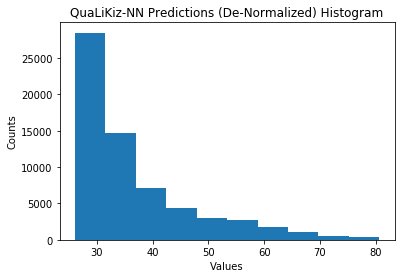

In [53]:
plt.hist(predictions_global_deNormalized)
plt.title('QuaLiKiz-NN Predictions (De-Normalized) Histogram')
plt.xlabel('Values')
plt.ylabel('Counts')
# plt.savefig('./2018-07-10_Run0050b_DataSlicerPlot/NN_Predictions.png', dpi = 100)
plt.show()

In [54]:
print(predictions_global.shape)

(63933,)


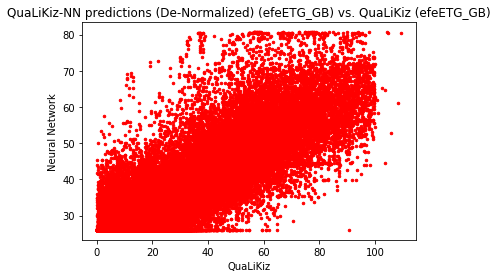

In [55]:
plt.plot(y_test_deNormalized_np_array, predictions_global_deNormalized, 'r.', ms = 5, label = 'QuaLiKiz-NN')
plt.title('QuaLiKiz-NN predictions (De-Normalized) (efeETG_GB) vs. QuaLiKiz (efeETG_GB)')
plt.xlabel('QuaLiKiz')
plt.ylabel('Neural Network')
plt.show()

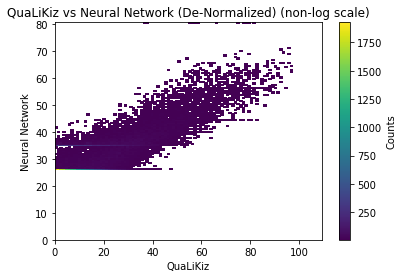

In [56]:
plt.hist2d(y_test_deNormalized_np_array, predictions_global_deNormalized, bins=100, cmin=5)
# plt.plot( [0,1],[0,1] )
plt.title('QuaLiKiz vs Neural Network (De-Normalized) (non-log scale)')
plt.xlabel('QuaLiKiz')
plt.ylabel('Neural Network')
plt.ylim(0)
plt.xlim(0)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
# plt.savefig('./2018-07-10_Run0050b_DataSlicerPlot/QuaLiKiz-vs-NN_nonLogScale_bins100.png', dpi = 100)
plt.show()

### Sigmas (De-Normalized)

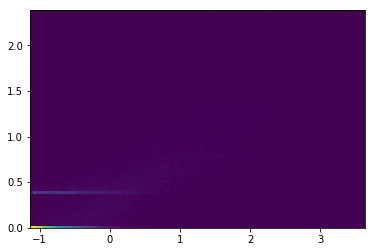

In [57]:
h = plt.hist2d(y_test_np_array, predictions_global,bins = 100)

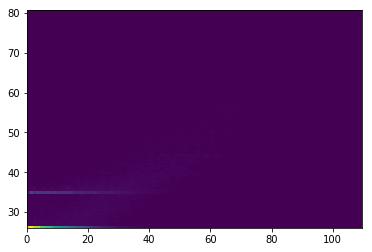

In [58]:
h_deNormalized = plt.hist2d(y_test_deNormalized_np_array, predictions_global_deNormalized,bins = 100)

In [59]:
sigmas_deNormalized = []
Qualikiz_deNormalized = y_test_deNormalized_np_array
for i in range(len(h[0])):
    sigmas_deNormalized.append(numpy.std(h_deNormalized[0][i] / numpy.max(h_deNormalized[0][i])))

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


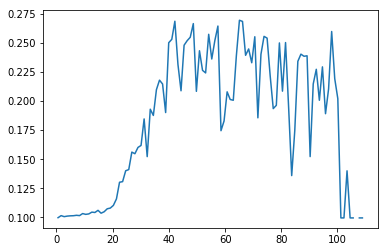

In [60]:
plt.plot((numpy.array(h_deNormalized[1][1:]) + numpy.array(h_deNormalized[1][:-1]))/2.,sigmas_deNormalized)
plt.show()

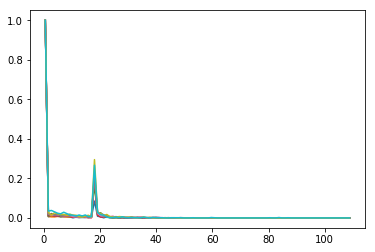

In [61]:
for i in range(10):
    plt.plot((h_deNormalized[1][1:] + h_deNormalized[1][:-1])/2., h_deNormalized[0][i]/numpy.max(h_deNormalized[0][i]) )

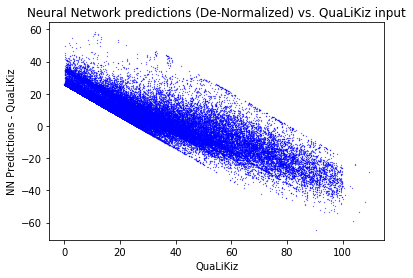

In [62]:
plt.plot(y_test_deNormalized_np_array, predictions_global_deNormalized - y_test_deNormalized_np_array, 'b.', ms = 0.5)
plt.title('Neural Network predictions (De-Normalized) vs. QuaLiKiz input')
plt.xlabel('QuaLiKiz')
plt.ylabel('NN Predictions - QuaLiKiz')
plt.show()

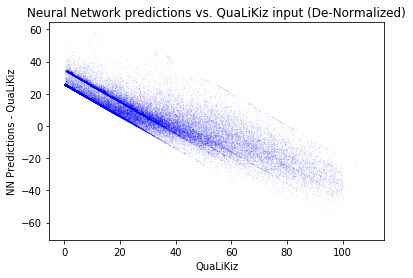

In [63]:
plt.plot(y_test_deNormalized_np_array, predictions_global_deNormalized - y_test_deNormalized_np_array, 'b.', ms = 0.1, alpha=0.5)
plt.title('Neural Network predictions vs. QuaLiKiz input (De-Normalized)')
plt.xlabel('QuaLiKiz')
plt.ylabel('NN Predictions - QuaLiKiz')
plt.show()

# Predictions (single Data Slice)

### Predictions - Initialise table to feed predictions

In [64]:
# table (Original values from input file unstable_training_gen2_7D_nions0_flat_filter7.h5)
# Hard-coded variables for the data slice

table = numpy.zeros((200,7))

table[:,0] = 5.75    # Ati
table[:,1] = numpy.linspace(2,14,200)   # Ate
table[:,2] = 3       # An
table[:,3] = 3       # qx
table[:,4] = 0.7     # smag
table[:,5] = 0.45    # x
table[:,6] = 1.33    # Ti_Te

table

array([[ 5.75      ,  2.        ,  3.        , ...,  0.7       ,
         0.45      ,  1.33      ],
       [ 5.75      ,  2.06030151,  3.        , ...,  0.7       ,
         0.45      ,  1.33      ],
       [ 5.75      ,  2.12060302,  3.        , ...,  0.7       ,
         0.45      ,  1.33      ],
       ...,
       [ 5.75      , 13.87939698,  3.        , ...,  0.7       ,
         0.45      ,  1.33      ],
       [ 5.75      , 13.93969849,  3.        , ...,  0.7       ,
         0.45      ,  1.33      ],
       [ 5.75      , 14.        ,  3.        , ...,  0.7       ,
         0.45      ,  1.33      ]])

In [65]:
# Normalized table (inputs for model.predict())
table_normalized = numpy.zeros((200,7))

DataSlice_Ati = 5.75
DataSlice_Ate = numpy.linspace(2,14,200)
DataSlice_An = 3
DataSlice_q = 3
DataSlice_smag = 0.7
DataSlice_x = 0.45
DataSlice_Ti_Te = 1.33

# Normalize data by standard deviation and mean-centering the data
table_normalized[:,0] = (DataSlice_Ati - joined_dataFrame_original['Ati'].mean()) / joined_dataFrame_original['Ati'].std()
table_normalized[:,1] = (DataSlice_Ate - joined_dataFrame_original['Ate'].mean()) / joined_dataFrame_original['Ate'].std()
table_normalized[:,2] = (DataSlice_An - joined_dataFrame_original['An'].mean()) / joined_dataFrame_original['An'].std()
table_normalized[:,3] = (DataSlice_q - joined_dataFrame_original['q'].mean()) / joined_dataFrame_original['q'].std()
table_normalized[:,4] = (DataSlice_smag - joined_dataFrame_original['smag'].mean()) / joined_dataFrame_original['smag'].std()
table_normalized[:,5] = (DataSlice_x - joined_dataFrame_original['x'].mean()) / joined_dataFrame_original['x'].std()
table_normalized[:,6] = (DataSlice_Ti_Te - joined_dataFrame_original['Ti_Te'].mean()) / joined_dataFrame_original['Ti_Te'].std()

In [66]:
table_normalized

array([[ 0.10626029, -2.15151054,  0.54563033, ...,  0.20304769,
        -0.11922898, -0.06771865],
       [ 0.10626029, -2.13158751,  0.54563033, ...,  0.20304769,
        -0.11922898, -0.06771865],
       [ 0.10626029, -2.11166448,  0.54563033, ...,  0.20304769,
        -0.11922898, -0.06771865],
       ...,
       [ 0.10626029,  1.77332621,  0.54563033, ...,  0.20304769,
        -0.11922898, -0.06771865],
       [ 0.10626029,  1.79324924,  0.54563033, ...,  0.20304769,
        -0.11922898, -0.06771865],
       [ 0.10626029,  1.81317227,  0.54563033, ...,  0.20304769,
        -0.11922898, -0.06771865]])

In [67]:
# Normalized table (inputs for model.predict())
table_branch1_normalized = numpy.zeros((200,6))

DataSlice_Ati = 5.75
#DataSlice_Ate = numpy.linspace(2,14,200)
DataSlice_An = 3
DataSlice_q = 3
DataSlice_smag = 0.7
DataSlice_x = 0.45
DataSlice_Ti_Te = 1.33

# Normalize data by standard deviation and mean-centering the data
table_branch1_normalized[:,0] = (DataSlice_Ati - joined_dataFrame_original['Ati'].mean()) / joined_dataFrame_original['Ati'].std()
#table_normalized[:,1] = (DataSlice_Ate - joined_dataFrame_original['Ate'].mean()) / joined_dataFrame_original['Ate'].std()
table_branch1_normalized[:,1] = (DataSlice_An - joined_dataFrame_original['An'].mean()) / joined_dataFrame_original['An'].std()
table_branch1_normalized[:,2] = (DataSlice_q - joined_dataFrame_original['q'].mean()) / joined_dataFrame_original['q'].std()
table_branch1_normalized[:,3] = (DataSlice_smag - joined_dataFrame_original['smag'].mean()) / joined_dataFrame_original['smag'].std()
table_branch1_normalized[:,4] = (DataSlice_x - joined_dataFrame_original['x'].mean()) / joined_dataFrame_original['x'].std()
table_branch1_normalized[:,5] = (DataSlice_Ti_Te - joined_dataFrame_original['Ti_Te'].mean()) / joined_dataFrame_original['Ti_Te'].std()

In [68]:
# Normalized table (inputs for model.predict())
table_branch2_normalized = numpy.zeros((200,1))

DataSlice_Ate = numpy.linspace(2,14,200)

# Normalize data by standard deviation and mean-centering the data
table_branch2_normalized[:,0] = (DataSlice_Ate - joined_dataFrame_original['Ate'].mean()) / joined_dataFrame_original['Ate'].std()

In [69]:
predictions = new_model.predict([table_branch1_normalized] + [table_branch2_normalized], batch_size = 10, verbose=0)
print(type(predictions))

predictions = predictions.flatten()
print(predictions.shape)
print(type(predictions))

<class 'numpy.ndarray'>
(200,)
<class 'numpy.ndarray'>


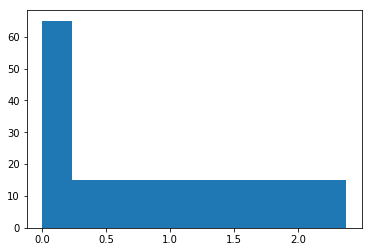

In [70]:
plt.hist(predictions)
plt.show()

# Masks

These are used to rapidly select which parameters to look at (for a given data slice).

#### Ate

In [71]:
Ate_mask1 = joined_dataFrame_original.Ate == 2
Ate_mask2 = joined_dataFrame_original.Ate == 2.75
Ate_mask3 = joined_dataFrame_original.Ate == 3.5
Ate_mask4 = joined_dataFrame_original.Ate == 4.25
Ate_mask5 = joined_dataFrame_original.Ate == 5
Ate_mask6 = joined_dataFrame_original.Ate == 5.75
Ate_mask7 = joined_dataFrame_original.Ate == 6.5
Ate_mask8 = joined_dataFrame_original.Ate == 7.25
Ate_mask9 = joined_dataFrame_original.Ate == 8
Ate_mask10 = joined_dataFrame_original.Ate == 10
Ate_mask11 = joined_dataFrame_original.Ate == 14

Ate_anti_mask1 = joined_dataFrame_original.Ate != 2
Ate_anti_mask2 = joined_dataFrame_original.Ate != 2.75
Ate_anti_mask3 = joined_dataFrame_original.Ate != 3.5
Ate_anti_mask4 = joined_dataFrame_original.Ate != 4.25
Ate_anti_mask5 = joined_dataFrame_original.Ate != 5
Ate_anti_mask6 = joined_dataFrame_original.Ate != 5.75
Ate_anti_mask7 = joined_dataFrame_original.Ate != 6.5
Ate_anti_mask8 = joined_dataFrame_original.Ate != 7.25
Ate_anti_mask9 = joined_dataFrame_original.Ate != 8
Ate_anti_mask10 = joined_dataFrame_original.Ate != 10
Ate_anti_mask11 = joined_dataFrame_original.Ate != 14

#### An

In [72]:
An_mask1 = joined_dataFrame_original.An == -5
An_mask2 = joined_dataFrame_original.An == -3
An_mask3 = joined_dataFrame_original.An == -1
An_mask4 = numpy.array(joined_dataFrame_original.An <= 1.1e-14) * numpy.array(joined_dataFrame_original.An >= 9E-15)
An_mask5 = joined_dataFrame_original.An == 0.5
An_mask6 = joined_dataFrame_original.An == 1.0
An_mask7 = joined_dataFrame_original.An == 1.5
An_mask8 = joined_dataFrame_original.An == 2.0
An_mask9 = joined_dataFrame_original.An == 2.5
An_mask10 = joined_dataFrame_original.An == 3.0
An_mask11 = joined_dataFrame_original.An == 4.0
An_mask12 = joined_dataFrame_original.An == 6.0

An_anti_mask1 = joined_dataFrame_original.An != -5
An_anti_mask2 = joined_dataFrame_original.An != -3
An_anti_mask3 = joined_dataFrame_original.An != -1
An_anti_mask4 = numpy.array(joined_dataFrame_original.An >= 1.1e-14) * numpy.array(joined_dataFrame_original.An <= 9E-15)
An_anti_mask5 = joined_dataFrame_original.An != 0.5
An_anti_mask6 = joined_dataFrame_original.An != 1.0
An_anti_mask7 = joined_dataFrame_original.An != 1.5
An_anti_mask8 = joined_dataFrame_original.An != 2.0
An_anti_mask9 = joined_dataFrame_original.An != 2.5
An_anti_mask10 = joined_dataFrame_original.An != 3.0
An_anti_mask11 = joined_dataFrame_original.An != 4.0
An_anti_mask12 = joined_dataFrame_original.An != 6.0

#### Ati

In [73]:
Ati_mask1 = numpy.array(joined_dataFrame_original.Ati <= 1.1e-14) * numpy.array(joined_dataFrame_original.Ati >= 9E-15)
Ati_mask2 = joined_dataFrame_original.Ati == 2
Ati_mask3 = joined_dataFrame_original.Ati == 2.75
Ati_mask4 = joined_dataFrame_original.Ati == 3.5
Ati_mask5 = joined_dataFrame_original.Ati == 4.25
Ati_mask6 = joined_dataFrame_original.Ati == 5
Ati_mask7 = joined_dataFrame_original.Ati == 5.75
Ati_mask8 = joined_dataFrame_original.Ati == 6.5
Ati_mask9 = joined_dataFrame_original.Ati == 7.25
Ati_mask10 = joined_dataFrame_original.Ati == 8
Ati_mask11 = joined_dataFrame_original.Ati == 10
Ati_mask12 = joined_dataFrame_original.Ati == 14

#### qx

In [74]:
q_mask0 = numpy.array(joined_dataFrame_original.q <= 0.67) * numpy.array(joined_dataFrame_original.q >= 0.65)  #0.66
q_mask1 = joined_dataFrame_original.q == 1.0
q_mask2 = joined_dataFrame_original.q == 1.5
q_mask3 = joined_dataFrame_original.q == 2.0
q_mask4 = joined_dataFrame_original.q == 2.5
q_mask5 = joined_dataFrame_original.q == 3.0
q_mask6 = joined_dataFrame_original.q == 4.0
q_mask7 = joined_dataFrame_original.q == 5.0
q_mask8 = joined_dataFrame_original.q == 10.00
q_mask9 = joined_dataFrame_original.q == 15.00

q_anti_mask0 = numpy.array(joined_dataFrame_original.q >= 0.67) * numpy.array(joined_dataFrame_original.q <= 0.65)  #0.66
q_anti_mask1 = joined_dataFrame_original.q != 1.0
q_anti_mask2 = joined_dataFrame_original.q != 1.5
q_anti_mask3 = joined_dataFrame_original.q != 2.0
q_anti_mask4 = joined_dataFrame_original.q != 2.5
q_anti_mask5 = joined_dataFrame_original.q != 3.0
q_anti_mask6 = joined_dataFrame_original.q != 4.0
q_anti_mask7 = joined_dataFrame_original.q != 5.0
q_anti_mask8 = joined_dataFrame_original.q != 10.00
q_anti_mask9 = joined_dataFrame_original.q != 15.00

#### smag

In [75]:
smag_mask1 = joined_dataFrame_original.smag == -1.0
smag_mask2 = numpy.array(joined_dataFrame_original.smag <= 0.11) * numpy.array(joined_dataFrame_original.smag >= 0.09)   # 0.1
smag_mask3 = numpy.array(joined_dataFrame_original.smag <= 0.41) * numpy.array(joined_dataFrame_original.smag >= 0.39)   # 0.4
smag_mask4 = numpy.array(joined_dataFrame_original.smag <= 0.71) * numpy.array(joined_dataFrame_original.smag >= 0.68)   # 0.7
smag_mask5 = joined_dataFrame_original.smag == 1
smag_mask6 = joined_dataFrame_original.smag == 1.5
smag_mask7 = joined_dataFrame_original.smag == 2.0
smag_mask8 = joined_dataFrame_original.smag == 2.75
smag_mask9 = joined_dataFrame_original.smag == 3.5
smag_mask10 = joined_dataFrame_original.smag == 5.0

smag_anti_mask1 = joined_dataFrame_original.smag != -1.0
smag_anti_mask2 = numpy.array(joined_dataFrame_original.smag >= 0.11) * numpy.array(joined_dataFrame_original.smag <= 0.09)   # 0.1
smag_anti_mask3 = numpy.array(joined_dataFrame_original.smag >= 0.41) * numpy.array(joined_dataFrame_original.smag <= 0.39)   # 0.4
smag_anti_mask4 = numpy.array(joined_dataFrame_original.smag >= 0.71) * numpy.array(joined_dataFrame_original.smag <= 0.68)   # 0.7
smag_anti_mask5 = joined_dataFrame_original.smag != 1
smag_anti_mask6 = joined_dataFrame_original.smag != 1.5
smag_anti_mask7 = joined_dataFrame_original.smag != 2.0
smag_anti_mask8 = joined_dataFrame_original.smag != 2.75
smag_anti_mask9 = joined_dataFrame_original.smag != 3.5
smag_anti_mask10 = joined_dataFrame_original.smag != 5.0

#### x

In [76]:
x_mask1 = numpy.array(joined_dataFrame_original.x <= 0.10) * numpy.array(joined_dataFrame_original.x >= 0.08)   # 0.09
x_mask2 = numpy.array(joined_dataFrame_original.x <= 0.22) * numpy.array(joined_dataFrame_original.x >= 0.20)   # 0.21
x_mask3 = numpy.array(joined_dataFrame_original.x <= 0.34) * numpy.array(joined_dataFrame_original.x >= 0.32)   # 0.33
x_mask4 = numpy.array(joined_dataFrame_original.x <= 0.46) * numpy.array(joined_dataFrame_original.x >= 0.44)   # 0.45
x_mask5 = numpy.array(joined_dataFrame_original.x <= 0.58) * numpy.array(joined_dataFrame_original.x >= 0.56)   # 0.57
x_mask6 = numpy.array(joined_dataFrame_original.x <= 0.70) * numpy.array(joined_dataFrame_original.x >= 0.68)   # 0.69
x_mask7 = numpy.array(joined_dataFrame_original.x <= 0.85) * numpy.array(joined_dataFrame_original.x >= 0.83)   # 0.84
x_mask8 = numpy.array(joined_dataFrame_original.x <= 1.00) * numpy.array(joined_dataFrame_original.x >= 0.98)   # 0.99
x_mask = {0.09: x_mask1}

x_anti_mask1 = numpy.array(joined_dataFrame_original.x >= 0.10) * numpy.array(joined_dataFrame_original.x <= 0.08)   # 0.09
x_anti_mask2 = numpy.array(joined_dataFrame_original.x >= 0.22) * numpy.array(joined_dataFrame_original.x <= 0.20)   # 0.21
x_anti_mask3 = numpy.array(joined_dataFrame_original.x >= 0.34) * numpy.array(joined_dataFrame_original.x <= 0.32)   # 0.33
x_anti_mask4 = numpy.array(joined_dataFrame_original.x >= 0.46) * numpy.array(joined_dataFrame_original.x <= 0.44)   # 0.45
x_anti_mask5 = numpy.array(joined_dataFrame_original.x >= 0.58) * numpy.array(joined_dataFrame_original.x <= 0.56)   # 0.57
x_anti_mask6 = numpy.array(joined_dataFrame_original.x >= 0.70) * numpy.array(joined_dataFrame_original.x <= 0.68)   # 0.69
x_anti_mask7 = numpy.array(joined_dataFrame_original.x >= 0.85) * numpy.array(joined_dataFrame_original.x <= 0.83)   # 0.84
x_anti_mask8 = numpy.array(joined_dataFrame_original.x >= 1.00) * numpy.array(joined_dataFrame_original.x <= 0.98)   # 0.99

#### Ti_Te

In [77]:
Ti_Te_mask1 = joined_dataFrame_original.Ti_Te == 0.25
Ti_Te_mask2 = joined_dataFrame_original.Ti_Te == 0.5
Ti_Te_mask3 = joined_dataFrame_original.Ti_Te == 0.75
Ti_Te_mask4 = joined_dataFrame_original.Ti_Te == 1
Ti_Te_mask5 = numpy.array(joined_dataFrame_original.Ti_Te <= 1.34) * numpy.array(joined_dataFrame_original.Ti_Te >= 1.32)   # 1.33
Ti_Te_mask6 = numpy.array(joined_dataFrame_original.Ti_Te <= 1.67) * numpy.array(joined_dataFrame_original.Ti_Te >= 1.65)   # 1.66
Ti_Te_mask7 = joined_dataFrame_original.Ti_Te == 2.50

# Plots

## Slice 1

In [78]:
'''
{'An': 3,
'Ati': 5.75,
'Ti_Te': 1.33,
'q': 3,
'smag': 0.7,
'x': 0.45}
'''
newDF = joined_dataFrame[An_mask10 & Ati_mask7 & q_mask5 & smag_mask4 & x_mask4 & Ti_Te_mask5]  # Variable 
newDF_Mk2 = joined_dataFrame_original[An_mask10 & Ati_mask7 & q_mask5 & smag_mask4 & x_mask4 & Ti_Te_mask5]  # Variable 
print(newDF)
print(type(newDF))

print(newDF_Mk2)
print(type(newDF_Mk2))

          efeETG_GB      Ati       Ate       An         q      smag         x  \
38605537  -0.813469  0.10626 -1.408133  0.54563 -0.320344  0.203048 -0.119229   
48067081  -0.557189  0.10626 -1.160340  0.54563 -0.320344  0.203048 -0.119229   
33674185   1.642665  0.10626 -0.416962  0.54563 -0.320344  0.203048 -0.119229   

             Ti_Te  
38605537 -0.067719  
48067081 -0.067719  
33674185 -0.067719  
<class 'pandas.core.frame.DataFrame'>
          efeETG_GB   Ati   Ate   An    q  smag     x  Ti_Te
38605537   7.413384  5.75  4.25  3.0  3.0   0.7  0.45   1.33
48067081  13.286460  5.75  5.00  3.0  3.0   0.7  0.45   1.33
33674185  63.699650  5.75  7.25  3.0  3.0   0.7  0.45   1.33
<class 'pandas.core.frame.DataFrame'>


In [79]:
efeETG_DF = newDF['efeETG_GB']
efeETG_DF_np_array = efeETG_DF.values
print(efeETG_DF_np_array)

Ate_DF = newDF['Ate']
Ate_DF_np_array = Ate_DF.values
print(Ate_DF_np_array)

[-0.81346937 -0.55718902  1.642665  ]
[-1.40813251 -1.16033984 -0.41696181]


In [80]:
efeETG_DF_Mk2 = newDF_Mk2['efeETG_GB']
efeETG_DF_Mk2_np_array = efeETG_DF_Mk2.values
print(efeETG_DF_Mk2_np_array)

Ate_DF_Mk2 = newDF_Mk2['Ate']
Ate_DF_Mk2_np_array = Ate_DF_Mk2.values
print(Ate_DF_Mk2_np_array)

[ 7.413384 13.28646  63.69965 ]
[4.25 5.   7.25]


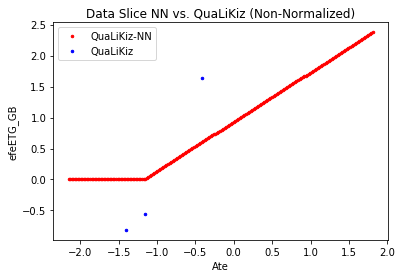

In [81]:
efeETG_DF = newDF['efeETG_GB']
Ate_DF = newDF['Ate']
plt.plot(table_normalized[:,1], predictions, 'r.', ms = 5, label = 'QuaLiKiz-NN')
plt.plot(Ate_DF_np_array, efeETG_DF_np_array, 'b.', ms = 5, label = 'QuaLiKiz')
plt.title('Data Slice NN vs. QuaLiKiz (Non-Normalized)')
plt.xlabel('Ate')
plt.ylabel('efeETG_GB')
plt.legend()
plt.show()

In [82]:
predictions_deNormalized = (predictions * joined_dataFrame_original['efeETG_GB'].std()) + joined_dataFrame_original['efeETG_GB'].mean()
print(predictions_deNormalized.shape)

(200,)


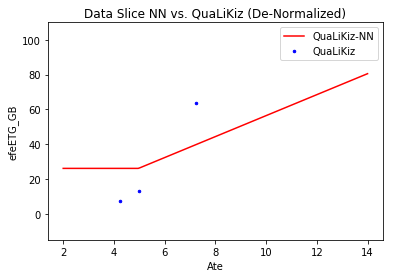

In [83]:
plt.plot(table[:,1], predictions_deNormalized, 'r-', ms = 5, label = 'QuaLiKiz-NN')
plt.plot(Ate_DF_Mk2_np_array, efeETG_DF_Mk2_np_array, 'b.', ms = 5, label = 'QuaLiKiz')
plt.title('Data Slice NN vs. QuaLiKiz (De-Normalized)')
plt.ylim(-15, 110)
plt.xlabel('Ate')
plt.ylabel('efeETG_GB')
plt.legend()
# plt.savefig('./2018-07-19_Plotting-Clean-Run0054/NN_Predictions.png', dpi = 100)
plt.show()

In [ ]:
plt.plot(table[:,1], predictions_deNormalized, 'r-', ms = 5, label = 'QuaLiKiz-NN')
plt.plot(Ate_DF_Mk2_np_array, efeETG_DF_Mk2_np_array, 'b.', ms = 5, label = 'QuaLiKiz')
plt.title('Data Slice NN vs. QuaLiKiz (De-Normalized)')
#plt.ylim(-15, 110)
plt.xlabel('Ate')
plt.ylabel('efeETG_GB')
plt.legend()
# plt.savefig('./2018-07-19_Plotting-Clean-Run0054/NN_Predictions.png', dpi = 100)
plt.show()

## Slice 2

In [ ]:
# TODO